In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv('Ambient_water_xray_data.txt', comment='#', sep='\\s+', skip_blank_lines=True, skiprows=[11])
df

,Q,I_X(Q),S_OO(Q),r,g_OO(r),error
0,0.000,6.430845,0.069924,0.00,0.000000,0.000000
1,0.025,6.430845,0.069924,0.01,0.000000,0.354929
2,0.050,6.430845,0.069924,0.02,0.000000,0.351654
3,0.075,6.430845,0.069924,0.03,0.000000,0.346308
4,0.100,6.430845,0.069924,0.04,0.000000,0.339058
...,...,...,...,...,...,...
1995,0.000,0.000000,0.000000,19.95,0.999850,0.001963
1996,0.000,0.000000,0.000000,19.96,0.999847,0.001961
1997,0.000,0.000000,0.000000,19.97,0.999846,0.001958
1998,0.000,0.000000,0.000000,19.98,0.999847,0.001956


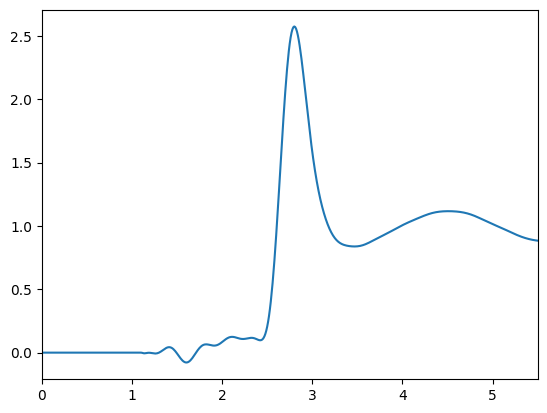

In [26]:
r, rdf = (df['r'].copy(), df['g_OO(r)'].copy())

plt.plot(r, rdf)
plt.xlim(0., 5.5)
plt.show()

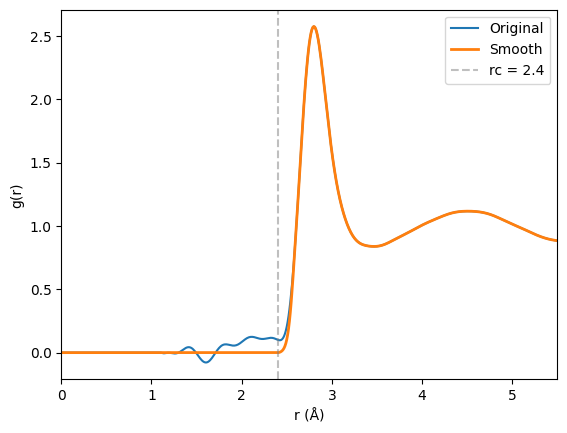

In [27]:
rc = 2.4
trans_width = 0.2

rdf_smooth = rdf.copy()

idx_zero = r < rc
idx_transition = (r >= rc) & (r < rc + trans_width)

# 1. We make 0 where r < rc
rdf_smooth[idx_zero] = 0.0

# 2. Smooth transition (Hann window) in range [rc, rc + trans_width]
t = (r[idx_transition] - rc) / trans_width  # Normalize
hann = 0.5 * (1 - np.cos(np.pi * t))
rdf_smooth[idx_transition] = rdf[idx_transition] * hann

plt.plot(r, rdf, label="Original")
plt.plot(r, rdf_smooth, label="Smooth", linewidth=2)
plt.axvline(rc, color="grey", linestyle="--", alpha=0.5, label="rc = {:.1f}".format(rc))

plt.xlabel("r (Å)")
plt.ylabel("g(r)")
plt.xlim(0., 5.5)
plt.legend()
plt.show()

In [28]:
distances = np.arange(2.25, 5.01, 0.01)
r = np.array(r)
mask = np.any(np.isclose(r[:, None], distances[None, :], atol=1e-8), axis=1)
rdf_to_safe = rdf_smooth[mask]

np.save('target', rdf_to_safe)
np.savetxt('rdf-distance.data', r[mask], fmt='%.2f')